In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = '728e45745a33a91d8c05fab213321cbd'

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [53]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    # If the city is unique, then add it to a our cities list & also add its corresponding country code
    if city_name not in cities:
        cities.append(city_name)
        country_codes.append(country_code)

# Print the city count to confirm sufficient count
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))

The above script has generated 631 different cities using random numbers.


In [51]:
#create a dataframe to store all the cities and countries generated with citipy
df_countries = pd.DataFrame({'City': cities, 'Country': country_codes})

#add additional blank columns to store information from openweathermap api
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Max Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries['Date'] = ''

# keeps count of those cities whose weather information is successfully obtained
city_count = 0

# initializing # of variables
api_call_count = 1 # count for API calls made to OpenWeatherAPI, max 60 counts allowed for free API calls
sets = 0 # counter to count the number of call sets
t0 = time.time() # get current time

#loop through all rows and fill in values for blank columns in dataframe
for index,row in df_countries.iterrows():
    city_name = row['City']
    country_id = row['Country']
    
    # create a dictionary to contain the query parameters
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "IMPERIAL",
        "mode": "json",
        "APPID": api_key
    }
    
    #api call for all Cities 
    target_url = "http://api.openweathermap.org/data/2.5/weather"
    country_info = requests.get(target_url, params = search_parameters).json()
    
    try:
        df_countries.loc[index,'Latitude'] = country_info['coord']['lat']
        df_countries.loc[index,'Longitude'] = country_info['coord']['lon']
        df_countries.loc[index,'Max Temperature (F)'] = country_info['main']['temp_max']
        df_countries.loc[index,'Humidity (%)'] = country_info['main']['humidity']
        df_countries.loc[index,'Cloudiness (%)'] = country_info['clouds']['all']
        df_countries.loc[index,'Wind Speed (mph)'] = country_info['wind']['speed']
        df_countries.loc[index, 'Date'] = country_info['dt']
        
        #print log for each city
        print(f'Processing Record {api_call_count} of Set {sets} | {city_name}' )
        
        city_count = city_count + 1 # only increment if you get all the weather information
    
    except KeyError:
        df_countries.loc[index,'Latitude'] = np.nan
        df_countries.loc[index,'Longitude'] = np.nan
        df_countries.loc[index,'Max Temperature (F)'] = np.nan
        df_countries.loc[index,'Humidity (%)'] = np.nan
        df_countries.loc[index,'Cloudiness (%)'] = np.nan
        df_countries.loc[index,'Wind Speed (mph)'] = np.nan
        df_countries.loc[index,'Date'] = np.nan
        print(f"Missing weather information for city named: {city_name} ...hence skipping")
    api_call_count = api_call_count + 1        
    if api_call_count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1 = time.time()
        api_call_count = 1 # reset it for next 50 calls
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()
print(f"Processing successfully completed. Retrieved weather information for {city_count} cities")

        

Processing Record 1 of Set 0 | coruripe
Processing Record 2 of Set 0 | luderitz
Processing Record 3 of Set 0 | albany
Processing Record 4 of Set 0 | ilulissat
Processing Record 5 of Set 0 | alice springs
Processing Record 6 of Set 0 | tiksi
Processing Record 7 of Set 0 | rikitea
Processing Record 8 of Set 0 | chuy
Processing Record 9 of Set 0 | alvorada
Processing Record 10 of Set 0 | upernavik
Processing Record 11 of Set 0 | bage
Processing Record 12 of Set 0 | victoria
Processing Record 13 of Set 0 | campamento
Processing Record 14 of Set 0 | yaqui
Processing Record 15 of Set 0 | severo-kurilsk
Missing weather information for city named: mataura ...hence skipping
Processing Record 17 of Set 0 | mackenzie
Missing weather information for city named: toliary ...hence skipping
Processing Record 19 of Set 0 | ushuaia
Processing Record 20 of Set 0 | cidreira
Processing Record 21 of Set 0 | jamestown
Processing Record 22 of Set 0 | vaini
Processing Record 23 of Set 0 | hinatuan
Missing weat

Processing Record 34 of Set 3 | port-gentil
Processing Record 35 of Set 3 | oistins
Processing Record 36 of Set 3 | hualmay
Processing Record 37 of Set 3 | kyshtovka
Processing Record 38 of Set 3 | kavaratti
Processing Record 39 of Set 3 | la rioja
Processing Record 40 of Set 3 | bilma
Missing weather information for city named: viligili ...hence skipping
Missing weather information for city named: codrington ...hence skipping
Missing weather information for city named: airai ...hence skipping
Processing Record 44 of Set 3 | sokolo
Missing weather information for city named: saleaula ...hence skipping
Processing Record 46 of Set 3 | nome
Processing Record 47 of Set 3 | waipawa
Processing Record 48 of Set 3 | arrifes
Processing Record 49 of Set 3 | bousso
Processing Record 50 of Set 3 | plouzane
Processing Record 1 of Set 4 | grindavik
Processing Record 2 of Set 4 | hastings
Processing Record 3 of Set 4 | lagoa
Processing Record 4 of Set 4 | ventspils
Processing Record 5 of Set 4 | naro

Processing Record 20 of Set 7 | bayan
Processing Record 21 of Set 7 | grand-santi
Processing Record 22 of Set 7 | sterling
Processing Record 23 of Set 7 | ifakara
Processing Record 24 of Set 7 | chicama
Processing Record 25 of Set 7 | sobolevo
Processing Record 26 of Set 7 | kewanee
Processing Record 27 of Set 7 | haines junction
Processing Record 28 of Set 7 | paita
Processing Record 29 of Set 7 | mahanoro
Processing Record 30 of Set 7 | winslow
Processing Record 31 of Set 7 | beloha
Processing Record 32 of Set 7 | fort wellington
Missing weather information for city named: jujuy ...hence skipping
Processing Record 34 of Set 7 | quatre cocos
Processing Record 35 of Set 7 | pisco
Processing Record 36 of Set 7 | ucluelet
Processing Record 37 of Set 7 | steinbach
Processing Record 38 of Set 7 | ankang
Processing Record 39 of Set 7 | palembang
Processing Record 40 of Set 7 | shitanjing
Processing Record 41 of Set 7 | tulum
Processing Record 42 of Set 7 | erzin
Processing Record 43 of Set 

Processing Record 10 of Set 11 | guardiagrele
Missing weather information for city named: ruatoria ...hence skipping
Processing Record 12 of Set 11 | san lorenzo
Processing Record 13 of Set 11 | gisborne
Processing Record 14 of Set 11 | brigantine
Missing weather information for city named: mocambique ...hence skipping
Processing Record 16 of Set 11 | nantucket
Processing Record 17 of Set 11 | yuci
Processing Record 18 of Set 11 | nacala
Missing weather information for city named: lasa ...hence skipping
Processing Record 20 of Set 11 | sabinas
Processing Record 21 of Set 11 | ugoofaaru
Processing Record 22 of Set 11 | pandan
Processing Record 23 of Set 11 | menongue
Processing Record 24 of Set 11 | dutlwe
Processing Record 25 of Set 11 | leningradskiy
Processing Record 26 of Set 11 | aykhal
Processing Record 27 of Set 11 | ohara
Processing Record 28 of Set 11 | fort-shevchenko
Processing Record 29 of Set 11 | huinan
Processing Record 30 of Set 11 | savannah bight
Processing Record 31 o

In [54]:
#change all data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Max Temperature (F)'] = pd.to_numeric(df_countries['Max Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

#display dataframe df_countries after openweathermap api calls removing those with NaNs elements
df_countries = df_countries.dropna()

# Reorder columns as we're interested in for the final DataFrame
df_countries = df_countries[["City", "Cloudiness (%)", "Country", "Date", "Humidity (%)","Latitude","Longitude",
                       "Max Temperature (F)", "Wind Speed (mph)"]]

print(df_countries.count()) # displays the count of rows
print(df_countries.head(20)) # displays first 20 records
df_countries.dtypes # displays the Dataype of dataframe
df_countries.to_csv(output_data_file, encoding="utf-8", index=False)

City                   560
Cloudiness (%)         560
Country                560
Date                   560
Humidity (%)           560
Latitude               560
Longitude              560
Max Temperature (F)    560
Wind Speed (mph)       560
dtype: int64
              City  Cloudiness (%) Country        Date  Humidity (%)  \
0         coruripe           100.0      br  1585505345          75.0   
1         luderitz             0.0      na  1585505345          64.0   
2           albany            90.0      au  1585505346          77.0   
3        ilulissat           100.0      gl  1585505108          97.0   
4    alice springs            68.0      au  1585505064          35.0   
5            tiksi            81.0      ru  1585505112          90.0   
6          rikitea            59.0      pf  1585505347          80.0   
7             chuy            30.0      uy  1585505348          61.0   
8         alvorada            73.0      br  1585505348          63.0   
9        upernavik      

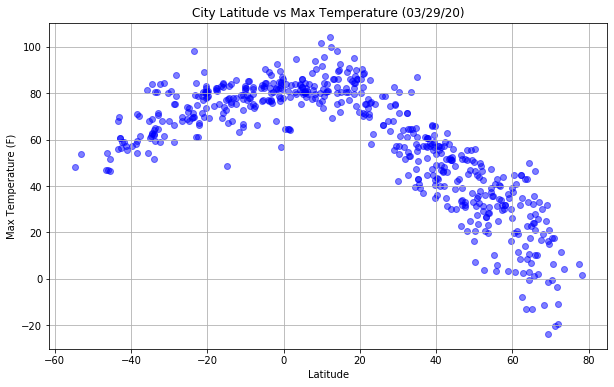

In [55]:
# Plotting the Data - Latitude vs. Temperature Plot
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Max Temperature (F)"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsMaxTemp.png")
plt.show()

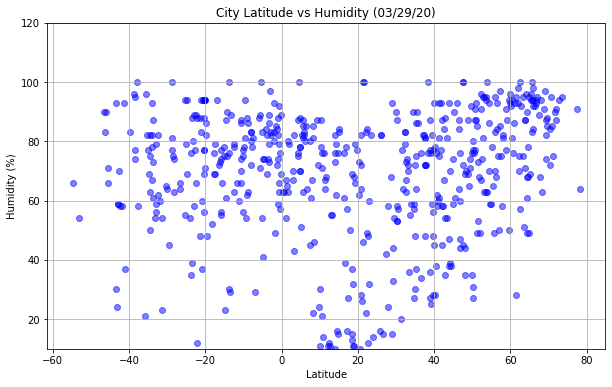

In [56]:
# Plotting the Data - Latitude vs. Humidity Plot
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Humidity (%)"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsHumidity.png")
plt.show()

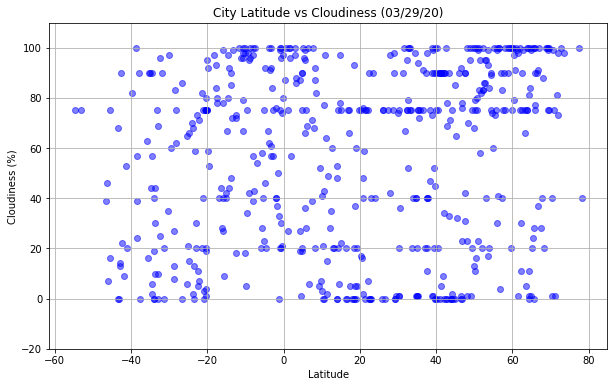

In [57]:

# Plotting the Data - Latitude vs. Cloudiness Plot
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Cloudiness (%)"], color='b', alpha=0.5)
plt.grid()
plt.ylim(-20,(df_countries["Cloudiness (%)"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsCloudiness.png")
plt.show()

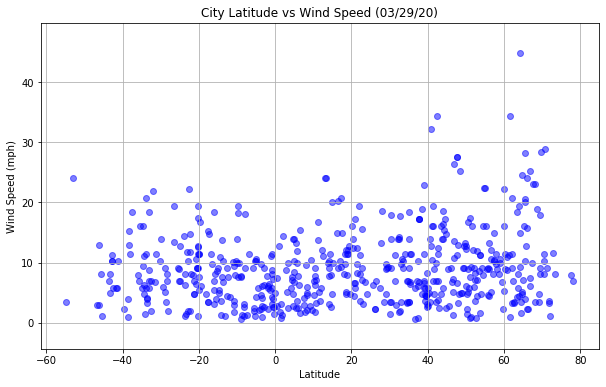

In [58]:
# Plotting the Data - Latitude vs. Wind Speed Plot
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Wind Speed (mph)"], color='blue', alpha=0.5)
plt.grid()
plt.ylim((df_countries["Wind Speed (mph)"].min()-5),(df_countries["Wind Speed (mph)"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.savefig("LatVsWind.png")
plt.show()